# Birds Species Classification - CNN

In this notebook, we are going to try out the classification using CNN and Dnse layers from TensorFlow

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Generate batches of tensor image data

In [2]:
from keras.preprocessing.image import ImageDataGenerator
training_images = ImageDataGenerator(rescale=1./255.,
                                      fill_mode='nearest')

train_generator = training_images.flow_from_directory("/kaggle/input/100-bird-species/train/",
                                                      target_size=(28,28))

validation_images = ImageDataGenerator(rescale=1./255.,
                                      fill_mode='nearest')

val_generator = validation_images.flow_from_directory("/kaggle/input/100-bird-species/valid/",
                                                      target_size=(28,28))

Found 81950 images belonging to 510 classes.
Found 2550 images belonging to 510 classes.


## Build the model

In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

K.clear_session()

reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(64,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(512,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(510,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the model

In [3]:
history = model.fit(train_generator,
                              validation_data=val_generator,
                              validation_steps=len(val_generator),
                              epochs=70,
                              callbacks=[reduce_lr,early_stop],
                              verbose=1)

Epoch 1/70
2561/2561 [==============================] - 673s 262ms/step - loss: 5.8331 - accuracy: 0.0133 - val_loss: 5.1758 - val_accuracy: 0.0412 - lr: 0.0010
Epoch 2/70
2561/2561 [==============================] - 223s 87ms/step - loss: 4.8382 - accuracy: 0.0767 - val_loss: 4.3146 - val_accuracy: 0.1220 - lr: 0.0010
Epoch 3/70
2561/2561 [==============================] - 228s 89ms/step - loss: 4.2929 - accuracy: 0.1448 - val_loss: 3.9761 - val_accuracy: 0.1729 - lr: 0.0010
Epoch 4/70
2561/2561 [==============================] - 226s 88ms/step - loss: 3.9561 - accuracy: 0.1958 - val_loss: 3.6086 - val_accuracy: 0.2412 - lr: 0.0010
Epoch 5/70
2561/2561 [==============================] - 224s 87ms/step - loss: 3.7270 - accuracy: 0.2341 - val_loss: 3.4325 - val_accuracy: 0.2580 - lr: 0.0010
Epoch 6/70
2561/2561 [==============================] - 219s 86ms/step - loss: 3.5678 - accuracy: 0.2622 - val_loss: 3.2832 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 7/70
2561/2561 [=================

This model works better than SVM but not as good as the benchmark model

## Model Description

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 64)       283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 12, 12, 64)       4416      
 leConv2D)                                                       
                                                                 
 global_max_pooling2d (Globa  (None, 64)               0         
 lMaxPooling2D)                                              

## Plotting out Loss and Accuracy curve

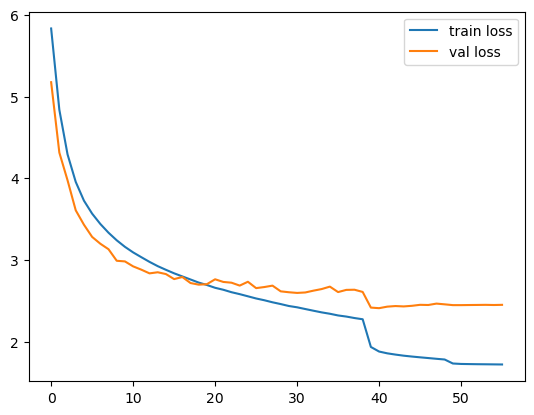

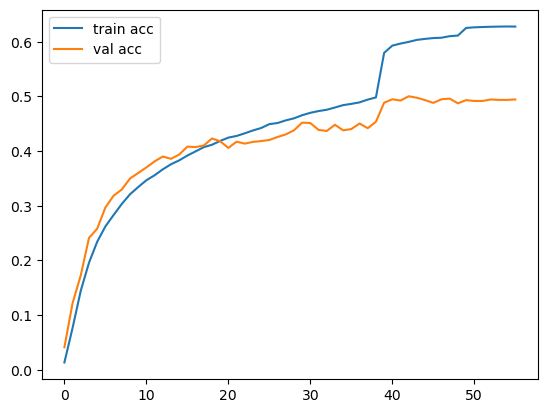

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Softmax prediction of all the images in validation directory

In [6]:
pred = model.predict(val_generator)
pred

80/80 [==============================] - 6s 77ms/step


array([[2.0207920e-10, 7.2176261e-03, 2.3788321e-10, ..., 1.2488281e-11,
        9.1415951e-11, 3.2289378e-07],
       [4.3739986e-12, 6.0215857e-13, 2.6185782e-08, ..., 5.0867920e-06,
        6.0620787e-06, 7.0553575e-15],
       [2.6499936e-03, 5.0428607e-06, 9.9910233e-07, ..., 1.2150112e-11,
        1.4806047e-06, 5.9291129e-03],
       ...,
       [4.5025648e-05, 1.8763989e-03, 4.7053704e-06, ..., 8.3144437e-07,
        7.1415220e-09, 2.7540088e-07],
       [1.2840815e-08, 5.0923473e-04, 3.2433957e-07, ..., 8.8398126e-12,
        2.9459759e-12, 3.4128865e-07],
       [1.8142632e-06, 4.6541798e-03, 2.8803468e-05, ..., 3.0181757e-06,
        2.6422571e-09, 2.6975723e-04]], dtype=float32)

## Displaying the image to be predict

In [7]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/kaggle/input/100-bird-species/images to predict/2.jpg')

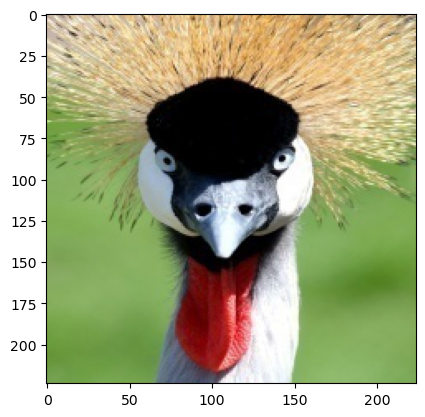

In [8]:
plt.imshow(img)

## Converting the image to numpy array

In [9]:
x=image.img_to_array(img)
x

array([[[174., 161., 152.],
        [208., 196., 180.],
        [186., 176., 151.],
        ...,
        [211., 183., 144.],
        [206., 182., 146.],
        [179., 156., 124.]],

       [[185., 168., 158.],
        [187., 171., 156.],
        [193., 181., 159.],
        ...,
        [199., 175., 149.],
        [166., 146., 122.],
        [188., 172., 149.]],

       [[194., 172., 159.],
        [192., 173., 159.],
        [189., 172., 156.],
        ...,
        [153., 137., 122.],
        [141., 129., 115.],
        [149., 140., 125.]],

       ...,

       [[115., 160.,  79.],
        [116., 161.,  80.],
        [116., 161.,  80.],
        ...,
        [125., 170.,  89.],
        [124., 169.,  88.],
        [125., 170.,  89.]],

       [[118., 161.,  81.],
        [117., 162.,  81.],
        [117., 162.,  81.],
        ...,
        [125., 170.,  89.],
        [125., 170.,  89.],
        [125., 170.,  89.]],

       [[119., 162.,  82.],
        [119., 162.,  82.],
        [119., 1

## Resizing the image for prediction

In [11]:
import tensorflow as tf
x = tf.image.resize(x, [28,28])
x.shape

TensorShape([28, 28, 3])

## Predicting the displayed image

In [12]:
x=np.expand_dims(x,axis=0)
model.predict(x)

1/1 [==============================] - 0s 114ms/step


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

## Extracting the index of the predicted class

In [13]:
a=np.argmax(model.predict(x), axis=1)
a

1/1 [==============================] - 0s 28ms/step


array([408])